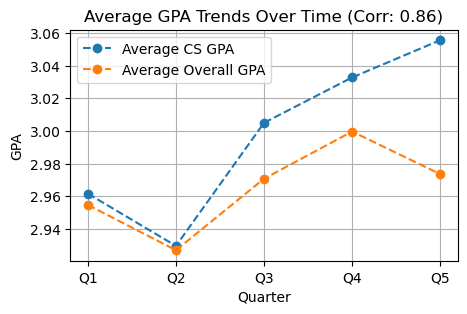

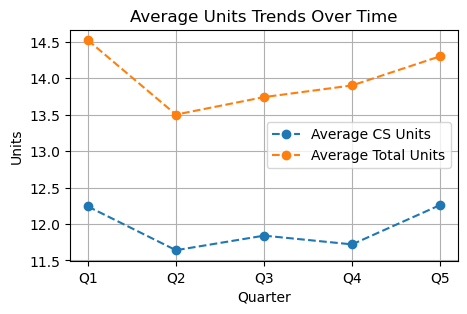

Overall CS GPA - CS Units Correlation: -0.05
Overall Overall GPA - Total Units Correlation: -0.05
    Timestamp    CS_GPA  Overall_GPA   CS_Units  Total_Units
0      202103  2.897500     2.957500  10.250000    12.000000
1      202108  2.767143     2.751429  10.142857    12.714286
2      202201  2.877692     2.822308  11.846154    14.307692
3      202203  3.017000     2.936750  11.600000    13.750000
4      202208  2.925238     2.880357  11.666667    13.190476
5      202301  2.943600     2.973600  11.680000    13.760000
6      202303  3.024615     3.041538  12.115385    14.538462
7      202308  2.967500     2.896429  12.428571    14.142857
8      202401  3.103000     3.082000  13.633333    15.733333
9      202403  3.072000     3.037300  11.320000    13.080000
10     202408  3.110909     3.027727  10.954545    13.000000
11     202501  3.112500     3.007292  11.333333    13.500000
12     202503  2.869167     2.928333  13.000000    15.416667
13     202508  2.732000     2.706000  12.400000 

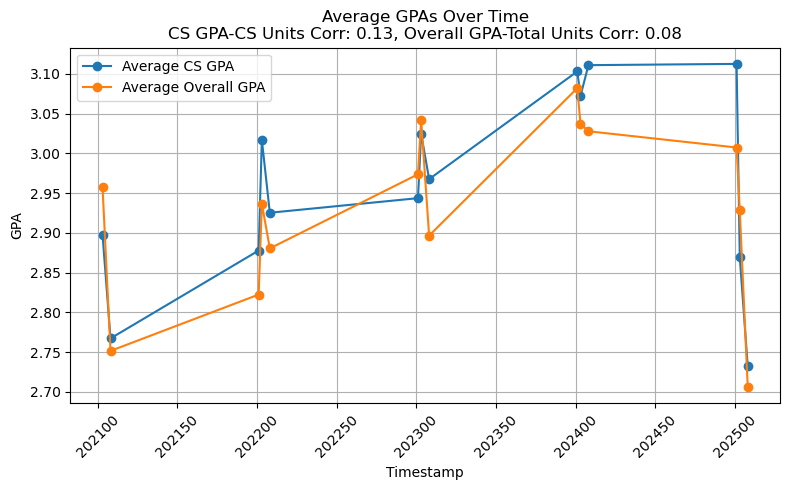

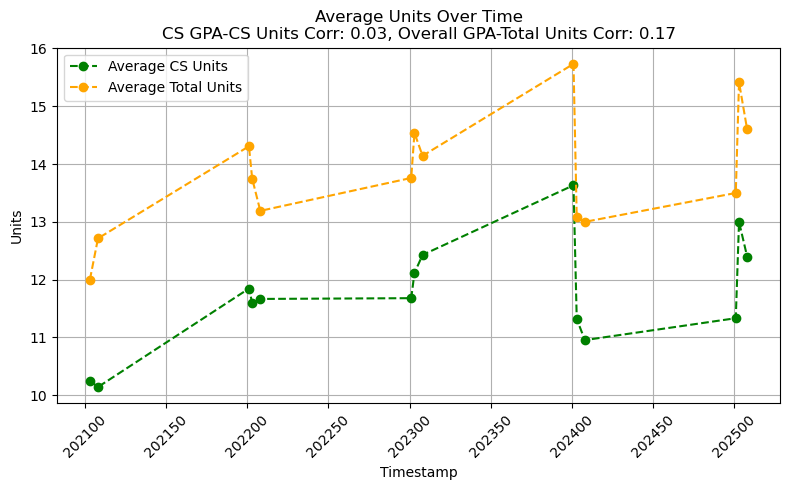

0.9047735174611532


In [65]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('fake_student_records.csv')

# Clean GPA higher than 4
for i in range(50):
    for j in range(1, 6):
        for gpa_type in ['CS_GPA', 'Overall_GPA']:
            col = f'Q{j}_{gpa_type}'
            if data.loc[i, col] > 4:
                total = sum(data.loc[i, f'Q{k}_{gpa_type}'] for k in range(1, 6) if k != j)
                mean = total / 4
                data = data.replace(data.loc[i, col], mean)

quarters = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5']

avg_cs_gpa = [data[f'{q}_CS_GPA'].mean() for q in quarters]
avg_overall_gpa = [data[f'{q}_Overall_GPA'].mean() for q in quarters]

avg_cs_gpa_series = pd.Series(avg_cs_gpa)
avg_overall_gpa_series = pd.Series(avg_overall_gpa)

gpa_correlation = avg_cs_gpa_series.corr(avg_overall_gpa_series)

plt.figure(figsize=(5, 3))
plt.plot(quarters, avg_cs_gpa, label='Average CS GPA', marker='o', linestyle='--')
plt.plot(quarters, avg_overall_gpa, label='Average Overall GPA', marker='o', linestyle='--')
plt.title(f'Average GPA Trends Over Time (Corr: {gpa_correlation:.2f})')
plt.xlabel('Quarter')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.show()

avg_cs_unit = [data[f'{q}_CS_Units'].mean() for q in quarters]
avg_overall_unit = [data[f'{q}_Total_Units'].mean() for q in quarters]


plt.figure(figsize=(5, 3))
plt.plot(quarters, avg_cs_unit, label='Average CS Units', marker='o', linestyle='--')
plt.plot(quarters, avg_overall_unit, label='Average Total Units', marker='o', linestyle='--')
plt.title('Average Units Trends Over Time')
plt.xlabel('Quarter')
plt.ylabel('Units')
plt.legend()
plt.grid(True)
plt.show()


cs_gpa_data = []
overall_gpa_data = []
cs_units_data = []
total_units_data = []

for q in quarters:
    cs_gpa_data.extend(data[f'{q}_CS_GPA'])
    overall_gpa_data.extend(data[f'{q}_Overall_GPA'])
    cs_units_data.extend(data[f'{q}_CS_Units'])
    total_units_data.extend(data[f'{q}_Total_Units'])

combined_data = pd.DataFrame({
    'CS_GPA': cs_gpa_data,
    'Overall_GPA': overall_gpa_data,
    'CS_Units': cs_units_data,
    'Total_Units': total_units_data
})

cs_gpa_cs_units_corr = combined_data['CS_GPA'].corr(combined_data['CS_Units'])
overall_gpa_total_units_corr = combined_data['Overall_GPA'].corr(combined_data['Total_Units'])

print(f'Overall CS GPA - CS Units Correlation: {cs_gpa_cs_units_corr:.2f}')
print(f'Overall Overall GPA - Total Units Correlation: {overall_gpa_total_units_corr:.2f}')


# Section: Aggregate GPA and Units Over Time
gpa_data = pd.DataFrame()
for q in quarters:
    temp_df = data[['StudentID', f'{q}_Timestamp', f'{q}_CS_GPA', f'{q}_Overall_GPA', f'{q}_CS_Units', f'{q}_Total_Units']].copy()
    temp_df.columns = ['StudentID', 'Timestamp', 'CS_GPA', 'Overall_GPA', 'CS_Units', 'Total_Units']
    gpa_data = pd.concat([gpa_data, temp_df])

# Calculate average GPA and units by time
average_gpa_units_by_time = gpa_data.groupby('Timestamp').agg({
    'CS_GPA': 'mean',
    'Overall_GPA': 'mean',
    'CS_Units': 'mean',
    'Total_Units': 'mean'
}).reset_index()

print(average_gpa_units_by_time)

cs_gpa_cs_units_corr = average_gpa_units_by_time['CS_GPA'].corr(average_gpa_units_by_time['CS_Units'])
cs_gpa_total_units_corr = average_gpa_units_by_time['CS_GPA'].corr(average_gpa_units_by_time['Total_Units'])
overall_gpa_cs_units_corr = average_gpa_units_by_time['Overall_GPA'].corr(average_gpa_units_by_time['CS_Units'])
overall_gpa_total_units_corr = average_gpa_units_by_time['Overall_GPA'].corr(average_gpa_units_by_time['Total_Units'])

plt.figure(figsize=(8, 5))
plt.plot(average_gpa_units_by_time['Timestamp'], average_gpa_units_by_time['CS_GPA'], label='Average CS GPA', marker='o')
plt.plot(average_gpa_units_by_time['Timestamp'], average_gpa_units_by_time['Overall_GPA'], label='Average Overall GPA', marker='o')
plt.title(f'Average GPAs Over Time\nCS GPA-CS Units Corr: {cs_gpa_cs_units_corr:.2f}, Overall GPA-Total Units Corr: {overall_gpa_total_units_corr:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('GPA')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(8, 5))
plt.plot(average_gpa_units_by_time['Timestamp'], average_gpa_units_by_time['CS_Units'], label='Average CS Units', marker='o', linestyle='--', color='g')
plt.plot(average_gpa_units_by_time['Timestamp'], average_gpa_units_by_time['Total_Units'], label='Average Total Units', marker='o', linestyle='--', color='orange')
plt.title(f'Average Units Over Time\nCS GPA-CS Units Corr: {cs_gpa_total_units_corr:.2f}, Overall GPA-Total Units Corr: {overall_gpa_cs_units_corr:.2f}')
plt.xlabel('Timestamp')
plt.ylabel('Units')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

corr = average_gpa_units_by_time['CS_GPA'].corr(average_gpa_units_by_time['Overall_GPA'])
print(corr)


